In [2]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
import numpy as np

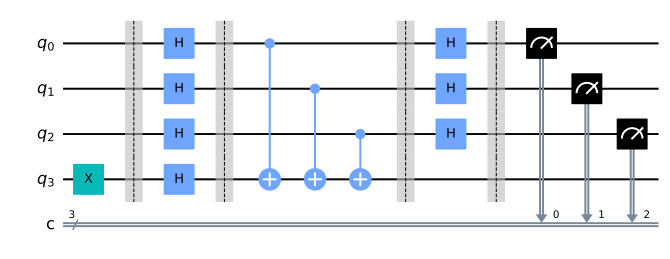

In [4]:
""" n=3のドイチュ・ジョサのアルゴリズム
【ドイチュ・ジョサの問題】
関数fは定数関数かバランス関数のどちらかである。
関数fにはビット長nのビット列が入力される。つまり入力パターンは2^nある。
定数関数は、すべての入力パターンに対して0 または 1を返す
バランス関数は、すべての入力パターンに対して、半分には0を返し、半分には1を返す
関数fが定数関数かバランス関数か判定せよ

【ドイチュ・ジョサの解法】
* 100%の確率で|00..0>が測定されたら定数関数
* |00..>が測定される確率が0%ならバランス関数
"""
n = 3  # ビット長
oracle = "b" # "b":バランス関数 "c":定数関数

# 定数関数の場合、出力0 or 1を返す
if oracle =="c":
    c = np.random.randint(2)

# 量子回路の作成
qc = QuantumCircuit(n+1, n)

# 下位1量子ビットは初期状態|1>
qc.x(n)
qc.barrier()

# 全量子ビットにHゲートを作用させる
for i in range(n+1):
    qc.h(i)
qc.barrier()

# オラクルに応じたゲートを作用させる
if oracle == "c":  # 定数関数の場合
    if c == 1:
        qc.x(n)
    else:
        qc.id(n)
else: # バランス関数の場合
    for i in range(n):
        qc.cx(i, n)
qc.barrier()

# 上位n量子ビットにHゲートを作用させる
for i in range(n):
    qc.h(i)
qc.barrier()

# 上位n量子ビットの測定
for i in range(n):
    qc.measure(i, i)

qc.draw()

{'111': 1024}


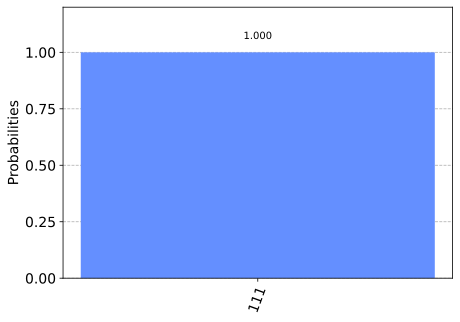

In [5]:
"""実行
"""
backend = Aer.get_backend("aer_simulator")
shots = 1024
results = execute(qc, backend=backend, shots=shots).result()
counts = results.get_counts()

print(counts)
plot_histogram(counts)